In [0]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, widgets

In [0]:
# Let's start with single independent variable and single dependent variable
# Let y = mx + c be our Linear model in which 'x' is independent variable, 'y' is dependent variable, 'm' is weight(adjusts the slope) and 'b' is bias(adjusts the Y-intercept)

# First, we will use Mean Square error as Cost function i.e., Error (E) = (1/N)SIGMA(yi-(m.xi+b))^2
# Let's define the cost function, provided x,y,m,b
def cost_function(x, y, m, b):
    data_points = len(x)
    total_error = 0.0
    for i in range(data_points):
        total_error += (y[i] - (m*x[i] + b))**2
    return total_error / data_points

# we will use gradient descent for updating weights
def update_weights(x, y, m, b, lr):
    weight_deriv = 0
    bias_deriv = 0
    data_points = len(x)

    for i in range(data_points):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (m*x[i] + b))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (m*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (weight_deriv / data_points) * lr
    b -= (bias_deriv / data_points) * lr

    return m, b

# Now that we have defined cost function and weight update functions, we can define our training strategy
def train(x, y, m, b, lr, epochs):
    cost_history = []

    for i in range(epochs):
        m,b = update_weights(x, y, m, b, lr)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, m, b)
        cost_history.append([i,m,b,cost])

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, m, b, cost))

    return m, b, cost_history

In [8]:
# Pizza Franchise data (X - Annual Franchise Fee(in $) , Y - Start up Cost(in $))
sample_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr12.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [9]:
# Top 5 rows of sample data
sample_data.head()

,X,Y
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


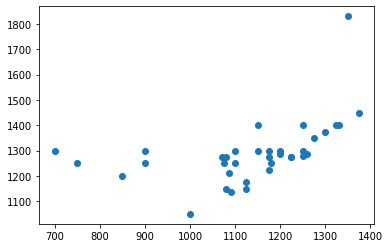

In [67]:
# XY Plot of sample data
plt.scatter(sample_data['X'],sample_data['Y'])

In [74]:
x = sample_data['X']
y = sample_data['Y']

# Training 
# we train to find best weight 'm' and bias 'b' that minimizes the cost function
fm, fb, fc = train(x,y,-10.8011,3.2015,0.000000008,200)

iter=0    weight=-10.55    bias=3.2017    cost=1.8e+08
iter=10    weight=-8.32    bias=3.2036    cost=1.2e+08
iter=20    weight=-6.51    bias=3.2052    cost=7.7e+07
iter=30    weight=-5.05    bias=3.2065    cost=5e+07
iter=40    weight=-3.87    bias=3.2075    cost=3.3e+07
iter=50    weight=-2.92    bias=3.2083    cost=2.1e+07
iter=60    weight=-2.15    bias=3.2090    cost=1.4e+07
iter=70    weight=-1.52    bias=3.2095    cost=9.2e+06
iter=80    weight=-1.02    bias=3.2100    cost=6e+06
iter=90    weight=-0.61    bias=3.2103    cost=3.9e+06
iter=100    weight=-0.28    bias=3.2106    cost=2.6e+06
iter=110    weight=-0.01    bias=3.2109    cost=1.7e+06
iter=120    weight=0.21    bias=3.2111    cost=1.1e+06
iter=130    weight=0.38    bias=3.2112    cost=7.4e+05
iter=140    weight=0.52    bias=3.2113    cost=5e+05
iter=150    weight=0.64    bias=3.2114    cost=3.3e+05
iter=160    weight=0.73    bias=3.2115    cost=2.3e+05
iter=170    weight=0.80    bias=3.2116    cost=1.6e+05
iter=180    we

iter=0    weight=-10.64    bias=3.2016    cost=1.8e+08
iter=10    weight=-9.19    bias=3.2029    cost=1.4e+08
iter=0    weight=-7.91    bias=3.2040    cost=1.1e+08
iter=10    weight=-6.80    bias=3.2050    cost=8.2e+07
iter=0    weight=-5.82    bias=3.2058    cost=6.3e+07
iter=10    weight=-4.96    bias=3.2066    cost=4.9e+07
iter=0    weight=-4.21    bias=3.2072    cost=3.7e+07
iter=10    weight=-3.55    bias=3.2078    cost=2.9e+07
iter=0    weight=-2.97    bias=3.2083    cost=2.2e+07
iter=10    weight=-2.46    bias=3.2087    cost=1.7e+07
iter=0    weight=-2.02    bias=3.2091    cost=1.3e+07
iter=10    weight=-1.63    bias=3.2094    cost=1e+07
iter=0    weight=-1.29    bias=3.2097    cost=7.7e+06
iter=10    weight=-0.99    bias=3.2100    cost=5.9e+06
iter=0    weight=-0.73    bias=3.2102    cost=4.5e+06
iter=10    weight=-0.50    bias=3.2104    cost=3.5e+06
iter=0    weight=-0.30    bias=3.2106    cost=2.7e+06
iter=10    weight=-0.13    bias=3.2108    cost=2.1e+06
iter=0    weight=0.0

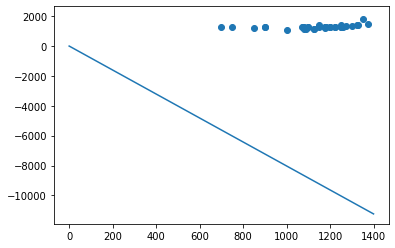

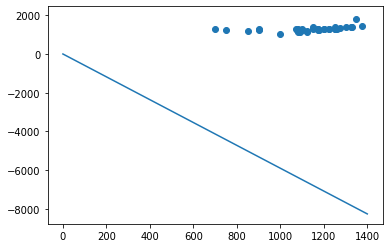

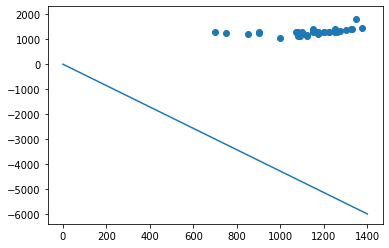

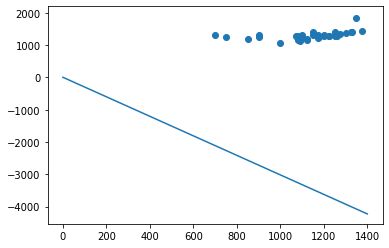

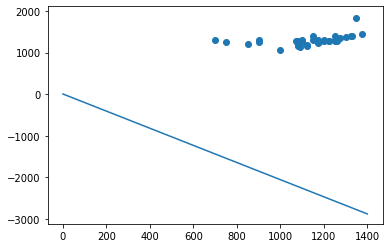

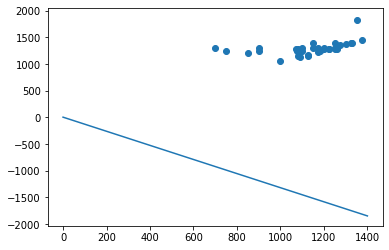

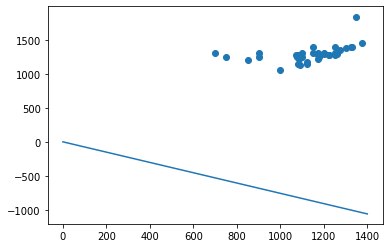

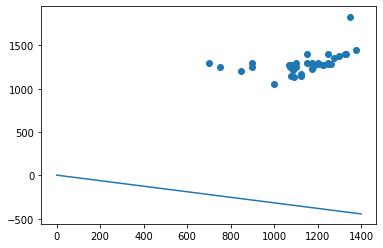

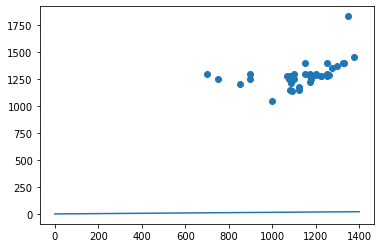

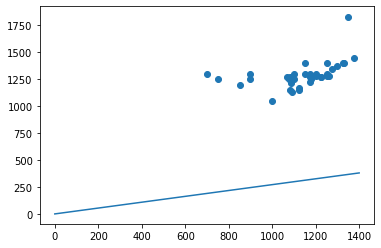

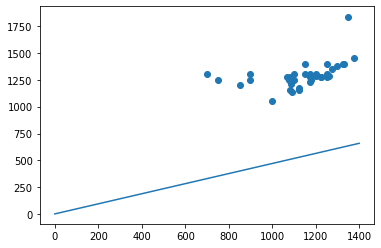

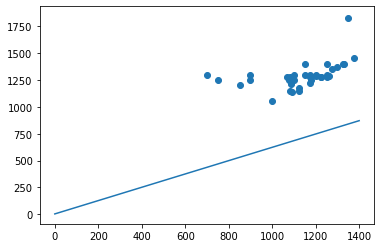

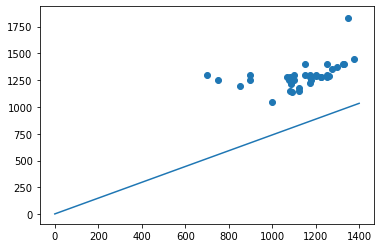

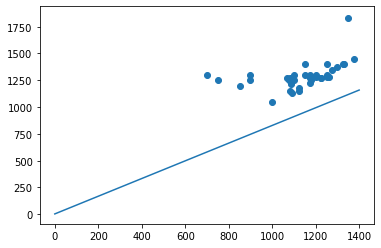

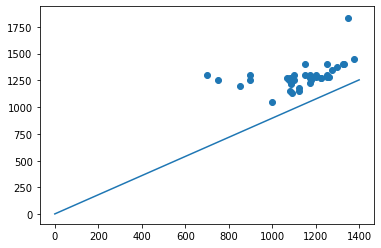

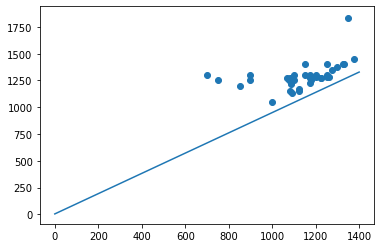

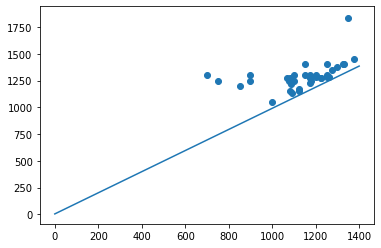

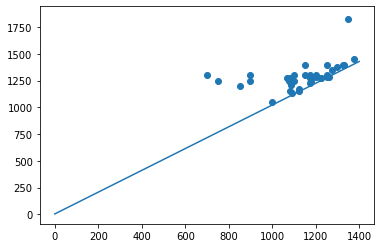

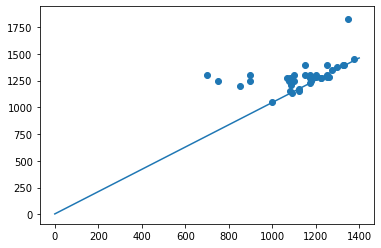

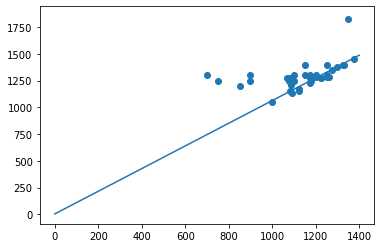

In [64]:
# Here you can visualize how the regression line transforms to fit the data best
fm, fb, fc = train(x,y,-10.8011,3.2015,0.000000005,20)
plt.figure()
plt.plot([0,1400],[fb,fm*1400+fb])
plt.scatter(x,y)
for i in range(1,20):
  fm, fb, fc = train(x,y,fm,fb,0.000000005,20)
  plt.figure()
  plt.plot([0,1400],[fb,fm*1400+fb])
  plt.scatter(x,y)

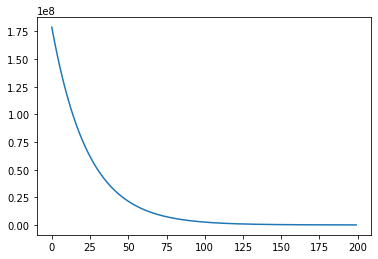

In [75]:
# Cost function vs Epochs
fc = np.asarray(fc)
plt.figure()
plt.plot(fc[:,0],fc[:,3])